In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.545388,0.862148,6.965205e-07,0.481645,0.841535,-0.040560,0.434226,0.779712,-0.068021,0.451129,...,0.612538,0.560391,-0.121336,0.626566,0.497691,-0.138521,0.634284,0.437241,-0.150156,You_Calling_Fish-4
1195,0.553546,0.855936,7.125228e-07,0.490713,0.837342,-0.040382,0.441721,0.778331,-0.067698,0.457805,...,0.620529,0.558154,-0.119226,0.633856,0.496775,-0.135798,0.640888,0.437478,-0.147213,You_Calling_Fish-4
1196,0.556969,0.841927,7.320034e-07,0.495993,0.827160,-0.040650,0.448283,0.770056,-0.068632,0.464155,...,0.622341,0.554010,-0.118684,0.635340,0.494105,-0.134733,0.641989,0.437079,-0.145892,You_Calling_Fish-4
1197,0.552303,0.817805,7.253170e-07,0.493274,0.802281,-0.035293,0.448434,0.746279,-0.060469,0.466633,...,0.622548,0.538147,-0.119004,0.634208,0.477838,-0.135535,0.639339,0.420079,-0.146689,You_Calling_Fish-4


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A_Gesture_NotGiven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.545388,0.862148,6.965205e-07,0.481645,0.841535,-0.040560,0.434226,0.779712,-0.068021,0.451129,...,0.612538,0.560391,-0.121336,0.626566,0.497691,-0.138521,0.634284,0.437241,-0.150156,You_Calling_Fish-4
1195,0.553546,0.855936,7.125228e-07,0.490713,0.837342,-0.040382,0.441721,0.778331,-0.067698,0.457805,...,0.620529,0.558154,-0.119226,0.633856,0.496775,-0.135798,0.640888,0.437478,-0.147213,You_Calling_Fish-4
1196,0.556969,0.841927,7.320034e-07,0.495993,0.827160,-0.040650,0.448283,0.770056,-0.068632,0.464155,...,0.622341,0.554010,-0.118684,0.635340,0.494105,-0.134733,0.641989,0.437079,-0.145892,You_Calling_Fish-4
1197,0.552303,0.817805,7.253170e-07,0.493274,0.802281,-0.035293,0.448434,0.746279,-0.060469,0.466633,...,0.622548,0.538147,-0.119004,0.634208,0.477838,-0.135535,0.639339,0.420079,-0.146689,You_Calling_Fish-4


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1199, 63)
Labels shape = (1199,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['Dive_Down', 'Good_Bye', 'A_Gesture_NotGiven', 'Dive_Up',
       'A_Gesture_NotGiven', 'Start_Control', 'Dive_Down',
       'You_Calling_Fish-2', 'You_Calling_Fish-4', 'You_Calling_Fish-3',
       'Good_Bye', 'You_Calling_Fish-3', 'Good_Bye', 'Good_Bye',
       'Good_Bye', 'A_Gesture_NotGiven', 'You_Calling_Fish-2', 'Dive_Up',
       'A_Gesture_NotGiven', 'You_Calling_Fish-3', 'You_Calling_Fish-2',
       'You_Calling_Fish-2', 'You_Calling_Fish-3', 'You_Calling_Fish-3',
       'You_Calling_Fish-2', 'A_Gesture_NotGiven', 'Turn_Right',
       'Dive_Up', 'You_Calling_Fish-1', 'You_Calling_Fish-4',
       'A_Gesture_NotGiven', 'A_Gesture_NotGiven', 'You_Calling_Fish-1',
       'Turn_Left', 'Start_Control', 'You_Calling_Fish-4', 'Dive_Up',
       'You_Calling_Fish-2', 'You_Calling_Fish-1', 'A_Gesture_NotGiven',
       'You_Calling_Fish-4', 'Dive_Down', 'Start_Control', 'Dive_Down',
       'Turn_Left', 'Start_Control', 'Good_Bye', 'You_Calling_Fish-3',
       'You_Calling_Fish-3', 'Tu

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8916666666666667, 0.8916666666666667, 0.8916666666666667)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

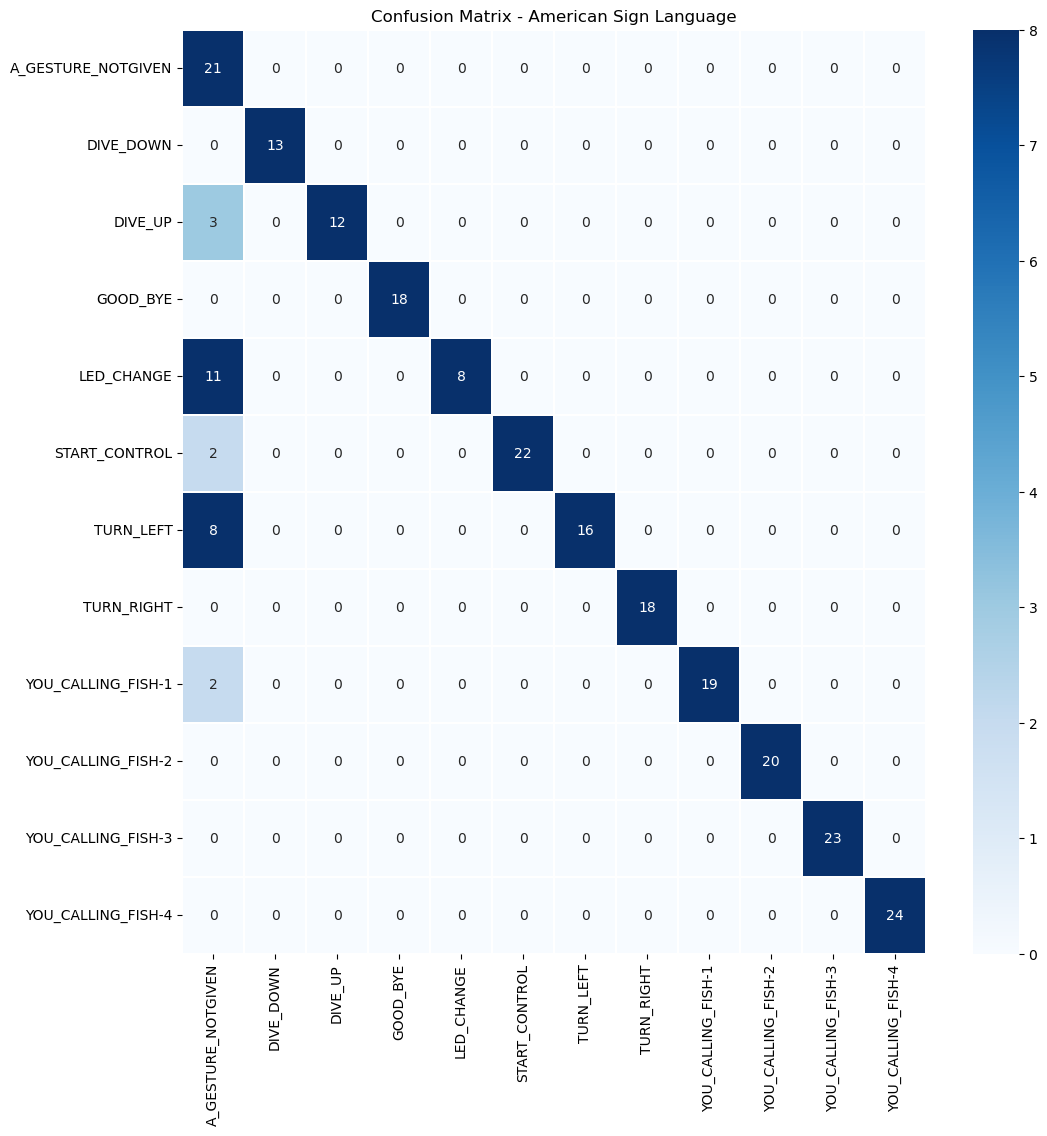

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)